# BOSTON HOUSE PRICE PREDICTION USING LINEAR REGRESSION

--------

<b>Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

<b>Loading Boston House Data

In [2]:
data = load_boston()

In [4]:
data.data.shape

(506, 13)

In [6]:
print(data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

<b>Preparing Data Frame

In [7]:
df = pd.DataFrame(data.data, columns= data.feature_names)

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
print(data.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

<b>Making Train & Test Sets

In [10]:
# Splitting Data in X & Y
X = data.data
Y = data.target

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=4, train_size=0.9)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [85]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(455, 13)
(51, 13)
(455,)
(51,)


<b>Creating Linear Regression Model & Fitting Training Sets

In [86]:
model = LinearRegression()

model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
print("Coefficient: ",model.coef_)
print("Intercept: ",model.intercept_)

Coefficient:  [-1.24793110e-01  4.83961673e-02  1.88111508e-02  3.08800922e+00
 -1.73655165e+01  3.60982405e+00  2.27233321e-03 -1.49381500e+00
  3.19455416e-01 -1.27236845e-02 -9.28369630e-01  9.60925451e-03
 -5.34508193e-01]
Intercept:  37.10993747516973


<b>Predicting Test Set & Generating Results

In [88]:
Y_pred = model.predict(X_test)

In [89]:
dict_result = {"Actual Y": Y_test, "Predicted Y": Y_pred}
result = pd.DataFrame(data=dict_result).reset_index(drop=True)
result.head(10)

,Actual Y,Predicted Y
0,16.5,11.452050
1,24.8,26.798940
2,17.4,17.438996
3,19.3,17.558652
4,37.6,37.387802
5,24.2,25.079169
6,35.4,31.052386
7,19.9,20.303707
8,27.5,19.644801
9,17.0,22.819539


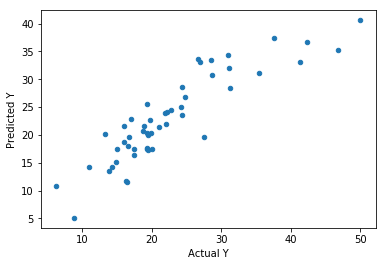

In [90]:
result.plot(kind="scatter", x="Actual Y", y="Predicted Y")

<b>Carrying Out Evaluations

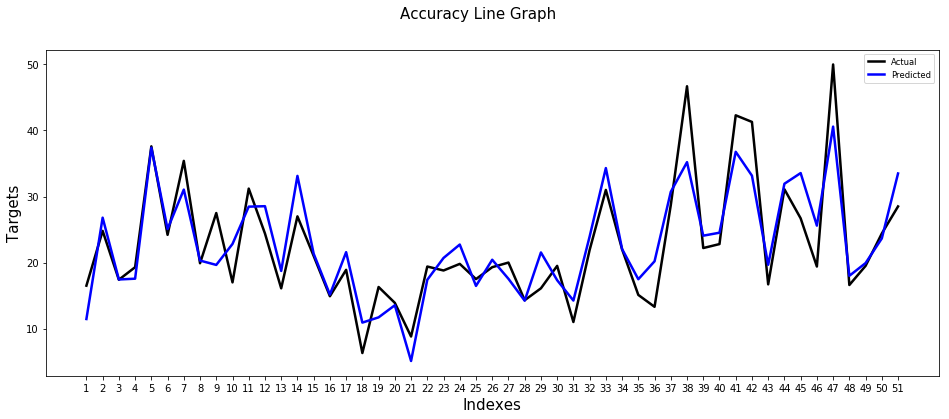

In [95]:
c = [i for i in range(1,52)]
fig = plt.figure(figsize=(16,6))
plt.plot(c,Y_test, color="black", linewidth=2.5, linestyle="-")
plt.plot(c,Y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle("Accuracy Line Graph", fontsize=15)
plt.xlabel("Indexes", fontsize=15)
plt.ylabel("Targets", fontsize=15)
plt.legend(labels=["Actual","Predicted"], loc=0, fontsize="small")
plt.xticks(np.arange(1,52),c)
plt.show()

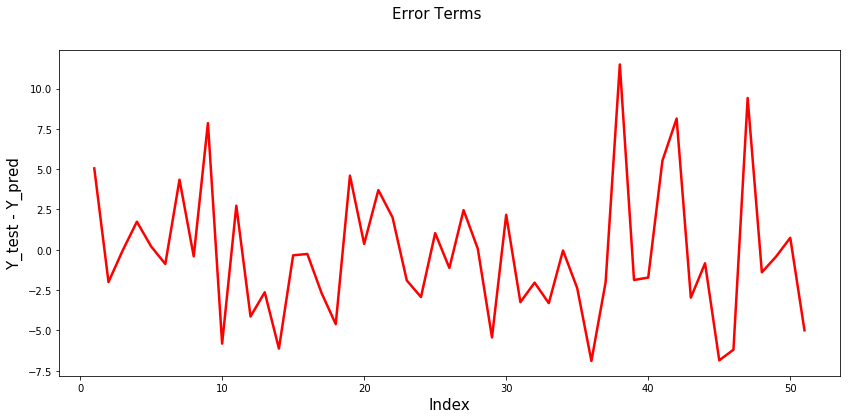

In [96]:
a = [i for i in range(1,52,1)]
fig = plt.figure(figsize=(14,6))
plt.plot(a,Y_test-Y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle("Error Terms", fontsize=15)
plt.xlabel("Index", fontsize=15)
plt.ylabel("Y_test - Y_pred", fontsize=15)
plt.show()

In [93]:
# Accuracy & Loss

mae = mean_absolute_error(Y_test, Y_pred)
score = r2_score(Y_test, Y_pred)
print("Mean Absolute Error:",round(mae,3))
print("Accuracy Score:",round(score*100,2))

Mean Absolute Error: 3.179
Accuracy Score: 79.27


------------